## Part A: Subreddit Prediction ##

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_validation = "coursework_subreddit_validation.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train2020.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_validation2020.json $subreddit_validation 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train2020.json...
- [1 files][  8.0 MiB/  8.0 MiB]                                                
Operation completed over 1 objects/8.0 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_validation2020.json...
/ [1 files][  2.1 MiB/  2.1 MiB]                                                
Operation completed over 1 objects/2.1 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


In [0]:
import pandas as pd

train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads.head())
print(train_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/relationships/comment...
1           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
2           1.0  ...  https://www.reddit.com/r/trees/comments/46d0iu...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/19...
4           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...

[5 rows x 5 columns]
5820


In [0]:
validation_threads = pd.read_json(path_or_buf=subreddit_validation, lines=True)
print(list(validation_threads.columns.values))
print(validation_threads.head())
print(validation_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/hearthstone/comments/...
1           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/tl...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
4           1.0  ...  https://www.reddit.com/r/reddit.com/comments/f...

[5 rows x 5 columns]
1460


In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)

   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/starcraft/comments/mq...
1           1.0  ...  https://www.reddit.com/r/whowouldwin/comments/...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/27...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/x9...
4           1.0  ...  https://www.reddit.com/r/tipofmytongue/comment...

[5 rows x 5 columns]
1825


In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits)

count     20.000000
mean      58.200000
std       60.248258
min       20.000000
25%       28.750000
50%       38.500000
75%       49.500000
max      276.000000
Name: subreddit, dtype: float64
askreddit               276
leagueoflegends         157
buildapc                103
explainlikeimfive        60
gaming                   51
trees                    49
techsupport              48
pcmasterrace             47
electronic_cigarette     46
relationships            42
tipofmytongue            35
summonerschool           33
jailbreak                31
hearthstone              30
whowouldwin              29
atheism                  28
personalfinance          27
reddit.com               27
movies                   25
starcraft                20
Name: subreddit, dtype: int64


In [0]:
train_labels = train_threads['subreddit']
validation_labels = validation_threads['subreddit']
test_labels = test_threads['subreddit']
print((train_labels))

0           relationships
1               askreddit
2                   trees
3               askreddit
4       explainlikeimfive
              ...        
1159             buildapc
1160          hearthstone
1161      leagueoflegends
1162      personalfinance
1163           reddit.com
Name: subreddit, Length: 1164, dtype: object


In [0]:
#Based on Text as Data lab 4 colab notebook by Dr.Jeff Dalton, University of Glasgow
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

#Based on Text as Data course lab 4 colab notebook by Dr.Jeff Dalton, University of Glasgow
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print()
  

In [0]:
def flatten_data(df):
    textrep = [df['title']]
    for post in df['posts']:
        if "id" in post:
          id = post['id']
          if id!='':
            textrep.append(id)
        
        if "body" in post:
            body = post['body'].strip()
            if body != '':
                textrep.append(body)
    return " ".join(textrep)
  
train_threads['textrep'] = train_threads.apply(flatten_data, axis=1)
validation_threads['textrep'] = validation_threads.apply(flatten_data, axis=1)
test_threads['textrep'] = test_threads.apply(flatten_data, axis=1)

<H1>Q1

ONE HOT VECTORIZATION

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize)
one_hot_vectorizer.fit(train_threads['textrep'])
train_features = one_hot_vectorizer.transform(train_threads['textrep'])
validation_features = one_hot_vectorizer.transform(validation_threads['textrep'])
test_features = one_hot_vectorizer.transform(test_threads['textrep'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TF-IDF VECTORIZATION

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)
tfidf_vectorizer.fit(train_threads['textrep'])
train_vector = tfidf_vectorizer.transform(train_threads['textrep'])
val_vector = tfidf_vectorizer.transform(validation_threads['textrep'])
test_vector = tfidf_vectorizer.transform(test_threads['textrep'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



EVALUATION ON VALIDATION SET

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')

#Dummy Classifier - Most frequent
dummy_1 = DummyClassifier(strategy="most_frequent").fit(train_features, train_labels)
evaluation_summary("Dummy-Most Frequent",  dummy_1.predict(validation_features), validation_labels)

#Dummy CLassifier - Stratified
dummy_2 = DummyClassifier(strategy="stratified").fit(train_features, train_labels)
evaluation_summary("Dummy-Stratified", dummy_2.predict(validation_features), validation_labels)

#Logistic regression - with one hot vectorization
logistic_reg_onehot = LogisticRegression().fit(train_features, train_labels)
evaluation_summary("Logistic Regression-onehot", logistic_reg_onehot.predict(validation_features), validation_labels)

#Logistic regression - with tfidf vectorization
logistic_reg_tfidf = LogisticRegression().fit(train_vector, train_labels)
evaluation_summary("Logistic Regression-tfidf",  logistic_reg_tfidf.predict(val_vector), validation_labels)

#svm - with one hot vectorization
svm = SVC(kernel='rbf').fit(train_features, train_labels)
evaluation_summary("SVC",  svm.predict(validation_features), validation_labels)

#Naive Bayes - with one hot vectorization 
nb_model = BernoulliNB().fit(train_features,train_labels)
evaluation_summary("Naive Bayes",  nb_model.predict(validation_features), validation_labels)

Evaluation for: Dummy-Most Frequent
Classifier 'Dummy-Most Frequent' has Acc=0.199 P=0.050 R=0.010 F1=0.017

Evaluation for: Dummy-Stratified
Classifier 'Dummy-Stratified' has Acc=0.079 P=0.029 R=0.031 F1=0.029

Evaluation for: Logistic Regression-onehot
Classifier 'Logistic Regression-onehot' has Acc=0.589 P=0.517 R=0.639 F1=0.527

Evaluation for: Logistic Regression-tfidf
Classifier 'Logistic Regression-tfidf' has Acc=0.449 P=0.235 R=0.453 F1=0.251

Evaluation for: SVC
Classifier 'SVC' has Acc=0.312 P=0.155 R=0.275 F1=0.152

Evaluation for: Naive Bayes
Classifier 'Naive Bayes' has Acc=0.315 P=0.106 R=0.130 F1=0.089



EVALUATION ON TEST SET

In [0]:
warnings.filterwarnings('ignore')

#Dummy Classifier - Most frequent
evaluation_summary("Dummy-Most Frequent",  dummy_1.predict(test_features), test_labels)

#Dummy CLassifier - Stratified
evaluation_summary("Dummy-Stratified", dummy_2.predict(test_features), test_labels)

#Logistic regression - with one hot vectorization
logreg_onehot_predict = logistic_reg_onehot.predict(test_features)
evaluation_summary("Logistic Regression-onehot",logreg_onehot_predict , test_labels)

#Logistic regression - with tfidf vectorization
evaluation_summary("Logistic Regression-tfidf", logistic_reg_tfidf.predict(test_vector) , test_labels)

#svm - with one hot vectorization
evaluation_summary("SVC",  svm.predict(test_features), test_labels)

#Naive Bayes - with one hot vectorization 
evaluation_summary("Naive Bayes",  nb_model.predict(test_features), test_labels)

Evaluation for: Dummy-Most Frequent
Classifier 'Dummy-Most Frequent' has Acc=0.230 P=0.050 R=0.012 F1=0.019

Evaluation for: Dummy-Stratified
Classifier 'Dummy-Stratified' has Acc=0.121 P=0.050 R=0.056 F1=0.051

Evaluation for: Logistic Regression-onehot
Classifier 'Logistic Regression-onehot' has Acc=0.595 P=0.468 R=0.565 F1=0.488

Evaluation for: Logistic Regression-tfidf
Classifier 'Logistic Regression-tfidf' has Acc=0.479 P=0.261 R=0.401 F1=0.275

Evaluation for: SVC
Classifier 'SVC' has Acc=0.326 P=0.158 R=0.200 F1=0.140

Evaluation for: Naive Bayes
Classifier 'Naive Bayes' has Acc=0.329 P=0.098 R=0.129 F1=0.083



In [0]:
print(classification_report(logreg_onehot_predict, test_labels, digits=3))

                      precision    recall  f1-score   support

           askreddit      0.821     0.552     0.660       125
             atheism      0.417     0.556     0.476         9
            buildapc      0.784     0.744     0.763        39
electronic_cigarette      0.667     0.667     0.667         9
   explainlikeimfive      0.571     0.727     0.640        11
              gaming      0.412     0.350     0.378        20
         hearthstone      0.267     1.000     0.421         4
           jailbreak      0.545     1.000     0.706         6
     leagueoflegends      0.833     0.606     0.702        66
              movies      0.000     0.000     0.000         1
        pcmasterrace      0.174     0.500     0.258         8
     personalfinance      0.800     1.000     0.889         8
          reddit.com      0.000     0.000     0.000         3
       relationships      0.667     0.571     0.615         7
           starcraft      0.000     0.000     0.000         0
      s

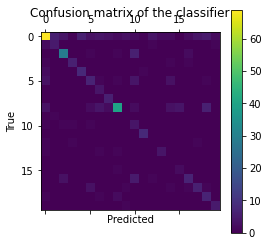

In [0]:
import pylab as pl
cm=confusion_matrix(logreg_onehot_predict, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

[Text(0, 0, 'askreddit'),
 Text(0, 0, 'atheism'),
 Text(0, 0, 'buildapc'),
 Text(0, 0, 'electronic_cigarette'),
 Text(0, 0, 'explainlikeimfive'),
 Text(0, 0, 'gaming'),
 Text(0, 0, 'hearthstone'),
 Text(0, 0, 'jailbreak'),
 Text(0, 0, 'leagueoflegends'),
 Text(0, 0, 'movies'),
 Text(0, 0, 'pcmasterrace'),
 Text(0, 0, 'personalfinance'),
 Text(0, 0, 'reddit.com'),
 Text(0, 0, 'relationships'),
 Text(0, 0, 'starcraft'),
 Text(0, 0, 'summonersschool'),
 Text(0, 0, 'techsupport'),
 Text(0, 0, 'tipofmytongue'),
 Text(0, 0, 'trees'),
 Text(0, 0, 'whowouldwin')]

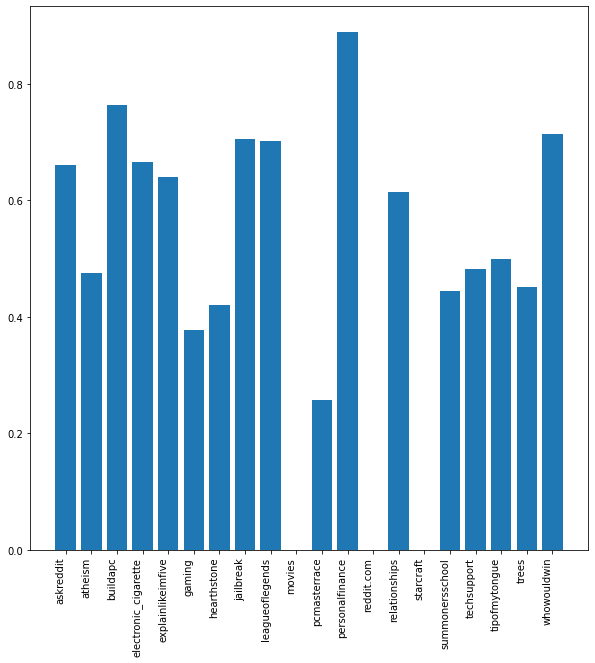

In [0]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

labels = ['askreddit', 'atheism', 'buildapc', 'electronic_cigarette','explainlikeimfive', 'gaming', 'hearthstone','jailbreak','leagueoflegends', 'movies', 'pcmasterrace','personalfinance', 'reddit.com', 'relationships', 'starcraft', 'summonersschool', 'techsupport','tipofmytongue', 'trees', 'whowouldwin' ]
f1score = f1_score(logreg_onehot_predict, test_labels, average=None)
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.bar(labels, f1score)
ax.set_xticklabels(labels, rotation=90, ha='right')


<H1> Q2

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
pipe = Pipeline(steps=[ 
                       ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
                       ('lr', LogisticRegression())])

params = {
    'tfidf__sublinear_tf': [True, False],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [5000, 10000, 20000, 30000],
    'lr__C': [0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(pipe, n_jobs=-1, param_grid=params, verbose=1, scoring='f1_macro')

grid.fit(validation_threads.textrep.values, validation_labels)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 14.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

	lr__C: 1000
	tfidf__max_features: 5000
	tfidf__ngram_range: (1, 2)
	tfidf__sublinear_tf: False


In [0]:
warnings.filterwarnings('ignore')
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize, max_features=5000, ngram_range=(1,2), sublinear_tf=False)
tfidf_vectorizer.fit(train_threads['textrep'])
train_vector = tfidf_vectorizer.transform(train_threads['textrep'])
test_vector = tfidf_vectorizer.transform(test_threads['textrep'])

logistic_reg = LogisticRegression(C=1000).fit(train_vector, train_labels)
predict1 = logistic_reg.predict(test_vector)
evaluation_summary("Best Model", predict1 , test_labels)

Evaluation for: Best Model
Classifier 'Best Model' has Acc=0.688 P=0.572 R=0.705 F1=0.601



In [0]:
# Counting label mismatch inspired from: https://datascience.stackexchange.com/questions/37899/sklearn-svm-how-to-get-a-list-of-the-wrong-predictions
import pandas as pd
predicted_1= predict.tolist()
test_label_list=test_labels.tolist()
mismatch=[i for i, j in zip(predicted_1, test_label_list) if  i!=j]
print("Mismatch has occured for the following labels:",mismatch)
print("Count of Mismatch labels:",len(mismatch))

predicted_2 = pd.Series(predict) 
temp = test_threads
temp = temp.assign(predict=predicted_2.values)
temp[['subreddit', 'predict']]

Mismatch has occured for the following labels: ['leagueoflegends', 'leagueoflegends', 'askreddit', 'askreddit', 'techsupport', 'askreddit', 'techsupport', 'explainlikeimfive', 'askreddit', 'askreddit', 'leagueoflegends', 'relationships', 'leagueoflegends', 'pcmasterrace', 'movies', 'askreddit', 'askreddit', 'askreddit', 'leagueoflegends', 'buildapc', 'buildapc', 'techsupport', 'leagueoflegends', 'askreddit', 'askreddit', 'buildapc', 'gaming', 'gaming', 'askreddit', 'buildapc', 'askreddit', 'askreddit', 'askreddit', 'gaming', 'explainlikeimfive', 'askreddit', 'movies', 'askreddit', 'gaming', 'relationships', 'askreddit', 'askreddit', 'askreddit', 'buildapc', 'explainlikeimfive', 'askreddit', 'askreddit', 'explainlikeimfive', 'leagueoflegends', 'leagueoflegends', 'explainlikeimfive', 'explainlikeimfive', 'askreddit', 'askreddit', 'tipofmytongue', 'atheism', 'askreddit', 'askreddit', 'askreddit', 'leagueoflegends', 'askreddit', 'gaming', 'askreddit', 'buildapc', 'askreddit', 'askreddit', 

,subreddit,predict
0,starcraft,leagueoflegends
1,whowouldwin,whowouldwin
2,askreddit,askreddit
3,askreddit,askreddit
4,tipofmytongue,tipofmytongue
...,...,...
360,reddit.com,askreddit
361,atheism,askreddit
362,pcmasterrace,pcmasterrace
363,askreddit,askreddit


<H1> Q3

EXTRACT FIELDS TO VECTORIZE

In [0]:
import numpy as np

def extract_id(df):
    id_arr=[]
    for post in df['posts']:
        if "id" in post:
          id = post['id']
          if id!='':
            id_arr.append(id)

    return " ".join(id_arr)


def extract_body(df):
    body_arr=[]
    for post in df['posts']:
        if "body" in post:
            body = post['body'].strip()
            if body != '':
                body_arr.append(body)
    return " ".join(body_arr)

def extract_len(df):
    len_arr=[]
    for post in df['posts']:
      len_arr.append(str(len(post)))
    return " ".join(len_arr)

def extract_author(df):
    author_arr=[]
    for post in df['posts']:
        if "author" in post:
            author = post['author']
            if author != '':
                author_arr.append(author)
    return " ".join(author_arr)

train_threads['id'] = train_threads.apply(extract_id, axis=1)
validation_threads['id'] = validation_threads.apply(extract_id, axis=1)
test_threads['id'] = test_threads.apply(extract_id, axis=1)

train_threads['body'] = train_threads.apply(extract_body, axis=1)
validation_threads['body'] = validation_threads.apply(extract_body, axis=1)
test_threads['body'] = test_threads.apply(extract_body, axis=1)

train_threads['postlen'] = train_threads.apply(extract_len, axis=1)
validation_threads['postlen'] = validation_threads.apply(extract_len, axis=1)
test_threads['postlen'] = test_threads.apply(extract_len, axis=1)

train_threads['author'] = train_threads.apply(extract_author, axis=1)
validation_threads['author'] = validation_threads.apply(extract_author, axis=1)
test_threads['author'] = test_threads.apply(extract_author, axis=1)

TFIDF PIPELINE - Based on best features of model from Q2

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

tfidf_pipeline = { 
     'postlen_feature': Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
            ('id', Pipeline([
              ('selector', ItemSelector(key='id')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
             ('postlen', Pipeline([
              ('selector', ItemSelector(key='postlen')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)),
              ])), 
        ])
        )
    ]),

    'author_feature': Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
            ('id', Pipeline([
              ('selector', ItemSelector(key='id')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
              ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)),
              ])),
        ])
        )
    ]),

    'combined_feature': Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
            ('id', Pipeline([
              ('selector', ItemSelector(key='id')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)), 
              ])),
             ('postlen', Pipeline([
              ('selector', ItemSelector(key='postlen')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)),
              ])), 
              ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 2),max_features=5000,)),
              ])),
        ])
        )
    ]),

    

}

In [0]:
warnings.filterwarnings('ignore')
for i in tfidf_pipeline:
  print(i)
  tfidf_pipeline[i].fit(train_threads)
  train_tfidf=tfidf_pipeline[i].transform(train_threads)
  test_tfidf=tfidf_pipeline[i].transform(test_threads)

  lr_best = LogisticRegression(C=1000).fit(train_tfidf, train_labels)
  predict=lr_best.predict(test_tfidf)
  evaluation_summary("Logistic Regession + TFIDF feature tuning",predict ,test_labels)

postlen_feature
Evaluation for: Logistic Regession + TFIDF feature tuning
Classifier 'Logistic Regession + TFIDF feature tuning' has Acc=0.674 P=0.557 R=0.710 F1=0.589

author_feature
Evaluation for: Logistic Regession + TFIDF feature tuning
Classifier 'Logistic Regession + TFIDF feature tuning' has Acc=0.660 P=0.534 R=0.689 F1=0.564

combined_feature
Evaluation for: Logistic Regession + TFIDF feature tuning
Classifier 'Logistic Regession + TFIDF feature tuning' has Acc=0.663 P=0.535 R=0.677 F1=0.563



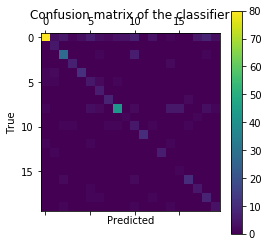

In [0]:
import pylab as pl
cm=confusion_matrix(predict, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

## Part B: Discourse prediction ##

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
- [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
/ [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

def load_posts(file):
  # A temporary variable to store the list of post content.
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
     # if (i > 2): break
      thread = json.loads(line)
      for post in thread['posts']:
        if(post.get('in_reply_to', "") == ""):
          initial_author = post.get('author', "")
      for post in thread['posts']:
        if(post.get('author', "") == initial_author):
          same_author = 1
        else:
          same_author = 0

        posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
                        post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), str(same_author),
                        str(post.get('post_depth', 0)), post.get('majority_type', ""), # discourse type label 
                        post.get('in_reply_to', "") ))

# Create the posts data frame.  
  labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 'same_author',
          'post_depth', 'discourse_type', 'in_reply_to']
  return pd.DataFrame(posts_tmp, columns=labels)

In [0]:
original_train_posts = load_posts(discourse_train)
# Filter out empty labels
original_train_posts = original_train_posts[original_train_posts['discourse_type'] != ""]
print(original_train_posts.head())
print("Num posts: ", original_train_posts.size)

    subreddit                           title  ... discourse_type in_reply_to
0  worldofpvp  Help me decide my new PvP main  ...       question            
1  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
2  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
3  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
4  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq

[5 rows x 11 columns]
Num posts:  871937


#### Development / Validation data

For part B it is up to you to split the "original" training data into a new train/validation (development) dataset appropriately. See Lab 4 for an example. 

In [0]:
validation_split = int(len(original_train_posts) * 0.8)
train_posts = original_train_posts.iloc[:validation_split,:]
validation_posts = original_train_posts.iloc[validation_split:,:]

### Test data

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]


### Labels

The label for the post we will be predicting is in the discourse_type column.

In [0]:
train_labels = train_posts['discourse_type']
validation_labels = validation_posts['discourse_type']
test_labels = test_posts['discourse_type']

Examine the distribution over labels on the training data.

In [0]:
discourse_counts = original_train_posts['discourse_type'].value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(20)
print(top_discourse)

count       10.000000
mean      7926.700000
std       9664.321866
min       1266.000000
25%       1671.500000
50%       3235.500000
75%      11919.750000
max      31419.000000
Name: discourse_type, dtype: float64
answer              31419
elaboration         14775
question            13610
appreciation         6849
agreement            3868
disagreement         2603
humor                1787
other                1633
announcement         1457
negativereaction     1266
Name: discourse_type, dtype: int64


<H1> Q4

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipe2 = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,)), 
              ])),
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,)), 
              ])),
             ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,)), 
              ])) 
        ])
        )
    ])

In [0]:
tfidf_pipe2.fit(train_posts)
train_tfidf=tfidf_pipe2.transform(train_posts)
val_tfidf=tfidf_pipe2.transform(validation_posts)
test_tfidf = tfidf_pipe2.transform(test_posts)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
dummy_3 = DummyClassifier(strategy="stratified").fit(train_tfidf, train_labels)
evaluation_summary("Dummy - Stratified : Validation Set",  dummy_3.predict(val_tfidf), validation_labels)
evaluation_summary("Dummy - Stratified : Test Set",  dummy_3.predict(test_tfidf), test_labels)

Evaluation for: Dummy - Stratified : Validation Set
Classifier 'Dummy - Stratified : Validation Set' has Acc=0.231 P=0.098 R=0.099 F1=0.098

Evaluation for: Dummy - Stratified : Test Set
Classifier 'Dummy - Stratified : Test Set' has Acc=0.235 P=0.100 R=0.100 F1=0.100



In [0]:
logistic_reg = LogisticRegression(C=10, penalty='l2')
logistic_reg.fit(train_tfidf, train_labels)
predict_logreg = logistic_reg.predict(val_tfidf)
evaluation_summary("Logistic Regression-tfidf", predict_logreg , validation_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Evaluation for: Logistic Regression-tfidf
Classifier 'Logistic Regression-tfidf' has Acc=0.479 P=0.269 R=0.352 F1=0.287



Evaluation for: Logistic Regression-tfidf
Classifier 'Logistic Regression-tfidf' has Acc=0.475 P=0.262 R=0.334 F1=0.279

                  precision    recall  f1-score   support

       agreement      0.239     0.393     0.297       578
    announcement      0.104     0.198     0.136       192
          answer      0.693     0.528     0.600     10418
    appreciation      0.588     0.672     0.627      1505
    disagreement      0.045     0.170     0.071       171
     elaboration      0.236     0.287     0.259      2992
           humor      0.037     0.181     0.062        94
negativereaction      0.101     0.263     0.146       118
           other      0.085     0.184     0.116       174
        question      0.487     0.467     0.477      3570

        accuracy                          0.475     19812
       macro avg      0.262     0.334     0.279     19812
    weighted avg      0.543     0.475     0.501     19812



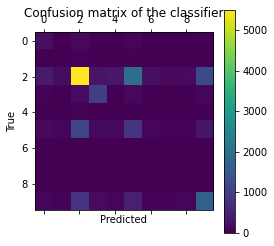

In [0]:
from sklearn.metrics import classification_report
import pylab as pl
test_logreg = logistic_reg.predict(test_tfidf)
evaluation_summary("Logistic Regression-tfidf", test_logreg , test_labels)
print(classification_report(test_logreg, test_labels, digits=3))
cm=confusion_matrix(test_logreg, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [0]:
!pip install eli5

In [0]:
import eli5
eli5.show_weights(logistic_reg, vec=tfidf_pipe2, top=20)

In [0]:
# Counting label mismatch inspired from: https://datascience.stackexchange.com/questions/37899/sklearn-svm-how-to-get-a-list-of-the-wrong-predictions
import pandas as pd
predicted_1= test_logreg.tolist()
test_label_list=test_labels.tolist()
mismatch=[i for i, j in zip(predicted_1, test_label_list) if  i!=j]
print("Mismatch has occured for the following labels:",mismatch)
print("Count of Mismatch labels:",len(mismatch))

Mismatch has occured for the following labels: ['appreciation', 'answer', 'question', 'answer', 'question', 'answer', 'answer', 'question', 'answer', 'elaboration', 'answer', 'answer', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'question', 'elaboration', 'answer', 'question', 'elaboration', 'question', 'elaboration', 'announcement', 'announcement', 'announcement', 'announcement', 'elaboration', 'question', 'answer', 'answer', 'answer', 'answer', 'appreciation', 'appreciation', 'question', 'answer', 'elaboration', 'answer', 'question', 'answer', 'elaboration', 'answer', 'answer', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'elaboration', 'answer', 'elaboration', 'elaboration', 'answer', 'answer', 'answer', 'agreement', 'answer', 'answer', 'question', 'question', 'answer', 'answer', 'answer', 'answer', 'answer', 'answer', 'answer', 'answer', 'agreement', 'question', 'elaboration', 'answer', 'answer', 'elaborati

<H1>Q5

In [0]:
!pip install --upgrade gensim
import gensim
import itertools
all_tokens = []
all_posts_tokenized = train_posts.body.apply(tokenize_normalize)
all_tokens = list(itertools.chain.from_iterable(all_posts_tokenized))

model = gensim.models.Word2Vec(all_posts_tokenized, size=50, window=5, \
                               min_count=5, sg=0, alpha=0.025, iter=10, batch_words=10000)

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)


In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class AverageEmbeddingVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, embedding_model):
        self.embedding = embedding_model
        self.dimension = embedding_model.vector_size

    def fit(self, X, y):
        return self
      
    def transform(self, X):  
      return np.array([ 
          np.mean([self.embedding[token] for token in doc if token in self.embedding]
                or [np.zeros(self.dimension)], axis=0)
          for doc in X
      ])
    
    
w2v_vectorizer = AverageEmbeddingVectorizer(model)

In [0]:
def create_w2v(x):
  doc = tokenize_normalize(x)
  X = [doc]
  w2c_vector = w2v_vectorizer.transform(X)
  string = ""
  for v in w2c_vector[0]:
    string += str(v) + " "
  return string
  
train_posts['wordtovec'] = train_posts.body.apply(create_w2v)
test_posts['wordtovec'] = test_posts.body.apply(create_w2v)

In [0]:
tfidf_pipe3 = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True, ngram_range=(1,2),)), 
              ])),
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,ngram_range=(1,2),)), 
              ])),
             ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True, ngram_range=(1,2),)), 
              ])),
              ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,ngram_range=(1,2),)), 
              ])),
              ('same_author', Pipeline([
              ('selector', ItemSelector(key='same_author')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,)), 
              ])),
              ('post_depth', Pipeline([
              ('selector', ItemSelector(key='post_depth')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,)), 
              ])),
              ('w2v', Pipeline([
              ('selector', ItemSelector(key='wordtovec')),
              ('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, sublinear_tf=True,)), 
              ])),
        ])
        )
    ])

In [0]:
#train_posts=train_posts.sample(5000)
#test_posts = test_posts.sample(5000)
#test_labels=test_labels.sample(5000)
#train_labels=train_labels.sample(5000)
tfidf_pipe3.fit(train_posts)
train_q5=tfidf_pipe3.transform(train_posts)
test_q5 = tfidf_pipe3.transform(test_posts)

In [0]:
logistic_reg = LogisticRegression(C=10, penalty='l2').fit(train_q5, train_labels)
predict_logreg = logistic_reg.predict(test_q5)
evaluation_summary("Logistic Regression-tfidf", predict_logreg , test_labels)

Evaluation for: Logistic Regression-tfidf
Classifier 'Logistic Regression-tfidf' has Acc=0.632 P=0.366 R=0.491 F1=0.395


Evaluation for: Q5
Classifier 'Q5' has Acc=0.632 P=0.366 R=0.491 F1=0.395
                  precision    recall  f1-score   support

       agreement      0.323     0.477     0.385       643
    announcement      0.400     0.764     0.525       191
          answer      0.840     0.678     0.751      9837
    appreciation      0.647     0.727     0.685      1532
    disagreement      0.087     0.280     0.133       200
     elaboration      0.471     0.447     0.459      3822
           humor      0.046     0.221     0.076        95
negativereaction      0.052     0.302     0.089        53
           other      0.080     0.280     0.124       107
        question      0.716     0.736     0.726      3332

        accuracy                          0.632     19812
       macro avg      0.366     0.491     0.395     19812
    weighted avg      0.695     0.632     0.657     19812



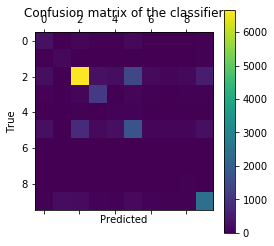

In [0]:
evaluation_summary("Q5", predict_logreg , test_labels)
print(classification_report(predict_logreg, test_labels, digits=3))
cm=confusion_matrix(predict_logreg, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()